In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_communication'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_communication'].max()
Min = Milan['review_scores_communication'].min()
Limites = [Min, Max]
Limites

[3.71, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.29

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.0830943057466717

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.71, 5, 16)
intervalos

array([3.71 , 3.796, 3.882, 3.968, 4.054, 4.14 , 4.226, 4.312, 4.398,
       4.484, 4.57 , 4.656, 4.742, 4.828, 4.914, 5.   ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy mala comunicación",
    "Mala comunicación",
    "Comunicación deficiente",
    "Poca comunicación",
    "Comunicación regular",
    "Comunicación aceptable",
    "Comunicación básica",
    "Comunicación fluida",
    "Comunicación buena",
    "Muy buena comunicación",
    "Excelente comunicación",
    "Comunicación destacada",
    "Comunicación sobresaliente",
    "Comunicación impecable",
    "Comunicación perfecta"
]



In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_communication'] = pd.cut ( x = Milan ['review_scores_communication'], bins = intervalos, labels = categorias )
Milan['review_scores_communication']

0         Comunicación perfecta
1        Comunicación destacada
2        Comunicación impecable
3         Comunicación perfecta
4        Comunicación impecable
                  ...          
23700     Comunicación perfecta
23701     Comunicación perfecta
23702     Comunicación perfecta
23703     Comunicación perfecta
23704     Comunicación perfecta
Name: review_scores_communication, Length: 23705, dtype: category
Categories (15, object): ['Muy mala comunicación' < 'Mala comunicación' < 'Comunicación deficiente' < 'Poca comunicación' ... 'Comunicación destacada' < 'Comunicación sobresaliente' < 'Comunicación impecable' < 'Comunicación perfecta']

In [12]:
table1 = freq_tbl(Milan['review_scores_communication'])
table1

,review_scores_communication,frequency,percentage,cumulative_perc
0,Comunicación perfecta,14838,0.625944,0.626155
1,Comunicación impecable,3275,0.138157,0.764358
2,Comunicación sobresaliente,1505,0.063489,0.827869
3,Comunicación destacada,1119,0.047205,0.875090
4,Muy buena comunicación,756,0.031892,0.906992
5,Excelente comunicación,598,0.025227,0.932228
6,Poca comunicación,414,0.017465,0.949698
7,Comunicación buena,339,0.014301,0.964004
8,Comunicación fluida,294,0.012402,0.976411
9,Comunicación básica,207,0.008732,0.985146


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_communication,frequency
0,Comunicación perfecta,14838
1,Comunicación impecable,3275
2,Comunicación sobresaliente,1505
3,Comunicación destacada,1119
4,Muy buena comunicación,756
5,Excelente comunicación,598
6,Poca comunicación,414
7,Comunicación buena,339
8,Comunicación fluida,294
9,Comunicación básica,207


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_communication')
Filtro_index

,frequency
review_scores_communication,
Comunicación perfecta,14838
Comunicación impecable,3275
Comunicación sobresaliente,1505
Comunicación destacada,1119
Muy buena comunicación,756
Excelente comunicación,598
Poca comunicación,414
Comunicación buena,339
Comunicación fluida,294


Text(0, 0.5, 'Frecuencia')

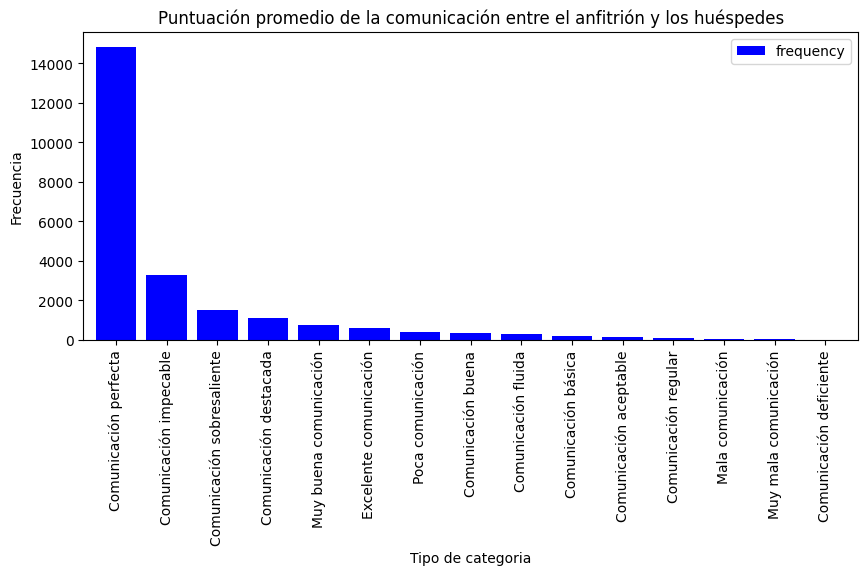

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la comunicación entre el anfitrión y los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')